In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.stats import pearsonr
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [3]:
atac_dir = "/mnt/c/Users/donna/Downloads/Thesis/data/atac_files/celltype_mats"
scrna_dir = "/mnt/c/Users/donna/Downloads/Thesis/data/scrna/expr_mats_atac/atac_match"

In [4]:
max_plots = 50

In [5]:
atac_files = [f for f in os.listdir(atac_dir) if f.endswith(".csv")]
scrna_files = [f for f in os.listdir(scrna_dir) if f.endswith(".csv")]

/tmp/ipykernel_536784/1540514355.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


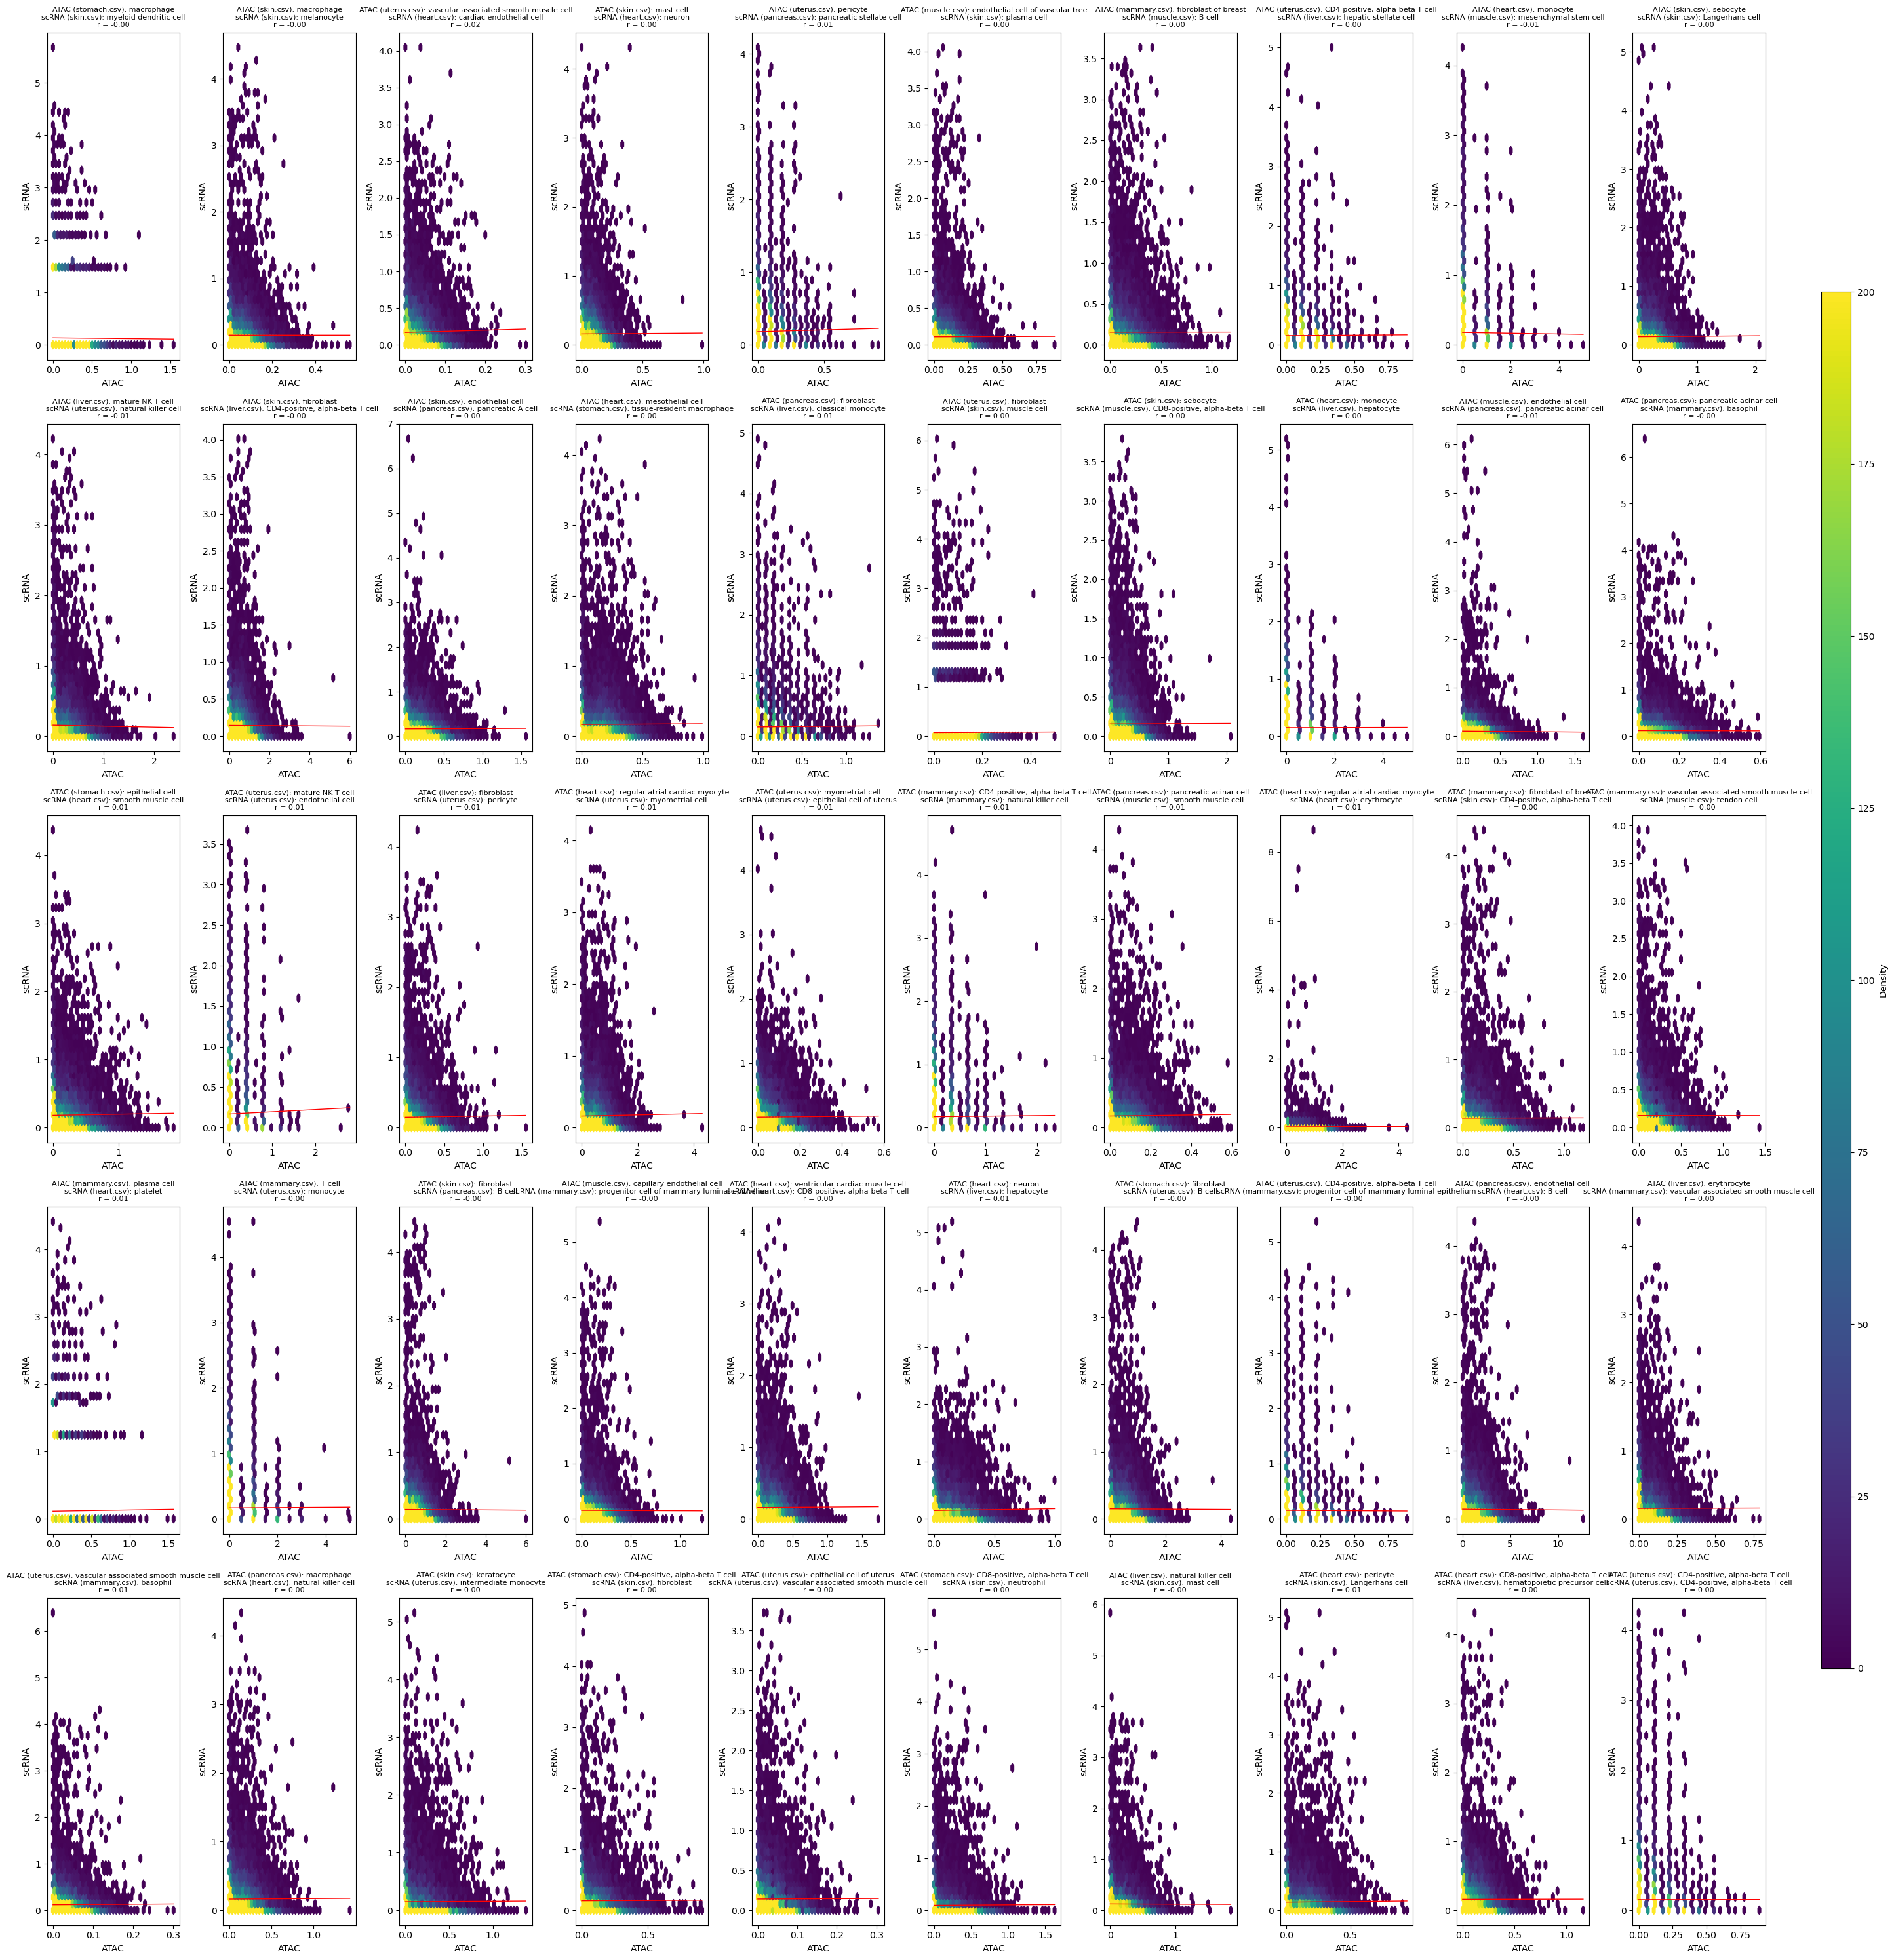

In [6]:
fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(30, 30))
axes = axes.flatten()

for i in range(max_plots):
    # Random file and column selection
    atac_file = random.choice(atac_files)
    scrna_file = random.choice(scrna_files)

    atac_tissue = atac_file.split('_')[0]
    scrna_tissue = scrna_file.split('_')[0]

    atac_df = pd.read_csv(os.path.join(atac_dir, atac_file), index_col=0)
    scrna_df = pd.read_csv(os.path.join(scrna_dir, scrna_file), index_col=0)

    atac_row = random.choice(atac_df.index)
    scrna_row = random.choice(scrna_df.index)

    # Extract the row as a Series
    atac_vals = atac_df.loc[atac_row]
    scrna_vals = scrna_df.loc[scrna_row]

    r, _ = pearsonr(atac_vals, scrna_vals)

    # Plot
    ax = axes[i]
    hb = ax.hexbin(
        atac_vals,
        scrna_vals,
        gridsize=40,
        cmap='viridis',          
        mincnt=1,
        reduce_C_function=np.sum,
        vmin=0,   
        vmax=200   
    )
    ax.set_title(
        f"ATAC ({atac_tissue}): {atac_row}\nscRNA ({scrna_tissue}): {scrna_row}\nr = {r:.2f}",
        fontsize=8
    )
    ax.set_xlabel("ATAC")
    ax.set_ylabel("scRNA")

    # Optional: add regression line
    m, b = np.polyfit(atac_vals, scrna_vals, 1)
    x_fit = np.array([min(atac_vals), max(atac_vals)])
    y_fit = m * x_fit + b
    ax.plot(x_fit, y_fit, color='red', linewidth=1)

cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])  # [left, bottom, width, height]
fig.colorbar(hb, cax=cbar_ax, label='Density')

plt.tight_layout(rect=[0, 0, 0.9, 1]) 
plt.show()

In [7]:
atac_tissue = "pancreas"
atac_sample = "B cell"

scrna_tissue = "pancreas"
scrna_sample = "B cell"

In [8]:
atac_path = os.path.join(atac_dir, f"{atac_tissue}.csv")
scrna_path = os.path.join(scrna_dir, f"{scrna_tissue}.csv")

atac_df = pd.read_csv(atac_path, index_col=0)
scrna_df = pd.read_csv(scrna_path, index_col=0)

In [9]:
atac_vals = atac_df.loc[atac_sample].values
scrna_vals = scrna_df.loc[scrna_sample].values

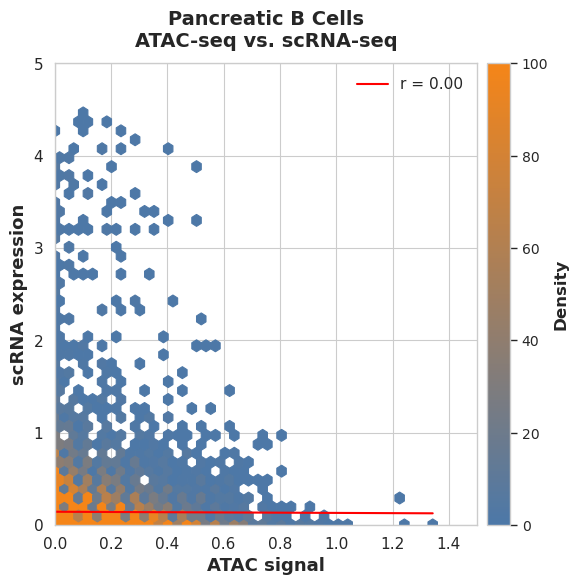

In [10]:
sns.set(style="whitegrid", context="paper", font_scale=1.2)

# custom orange‐to‐blue colormap
orange_blue = LinearSegmentedColormap.from_list(
    "orange_blue", ["#F58518", "#4C78A8"]
)

cmap_flipped = orange_blue.reversed()

FIGSIZE = (6, 6)
SAVE_PATH = "/mnt/c/Users/donna/Downloads/Thesis/data_analysis/plots/finals/dens_atac_scrna.png"
DPI = 600

# --- Create figure and axis ---
fig, ax = plt.subplots(figsize=FIGSIZE)

# --- Draw hexbin density plot ---
hb = ax.hexbin(
    atac_vals,
    scrna_vals,
    gridsize=40,
    cmap=cmap_flipped ,
    mincnt=1,
    reduce_C_function=np.sum,
    vmin=0, vmax=100
)

# --- Regression line ---
m, b = np.polyfit(atac_vals, scrna_vals, 1)
x_fit = np.array([atac_vals.min(), atac_vals.max()])
y_fit = m * x_fit + b
ax.plot(x_fit, y_fit, color="red", linewidth=1.5, label=f"r = {r:.2f}")

ax.set_xlim(0, 1.5)
ax.set_ylim(0, 5)

# --- Axis styling ---
ax.set_title("Pancreatic B Cells\nATAC-seq vs. scRNA-seq", 
             fontsize=14, weight="bold", pad=12)
ax.set_xlabel("ATAC signal", fontsize=13, weight="bold")
ax.set_ylabel("scRNA expression", fontsize=13, weight="bold")
ax.tick_params(axis="both", labelsize=11)

# --- Legend ---
ax.legend(frameon=False, fontsize=11)

# --- Colorbar ---
cbar = fig.colorbar(hb, ax=ax, pad=0.02)
cbar.set_label("Density", fontsize=12, weight="bold")
cbar.ax.tick_params(labelsize=10)

# --- Final layout and save ---
plt.tight_layout()
fig.savefig(SAVE_PATH, dpi=DPI, bbox_inches="tight")
plt.show()

In [11]:
## CFDNA AND ATAC SCATTERS

In [39]:
coad_cfdna_df = pd.read_csv("/mnt/c/Users/donna/Downloads/Thesis/data/TCGA/coad_cf_mat.csv")  # (columns = samples, rows = positions)
brca_cfdna_df = pd.read_csv("/mnt/c/Users/donna/Downloads/Thesis/data/TCGA/brca_cf_mat.csv")
coad_atac_df = pd.read_csv("/mnt/c/Users/donna/Downloads/Thesis/brca_correlaties/TCGA_data/coad_atac_data.csv")     
brca_atac_df = pd.read_csv("/mnt/c/Users/donna/Downloads/Thesis/brca_correlaties/TCGA_data/brca_atac_data.csv")  

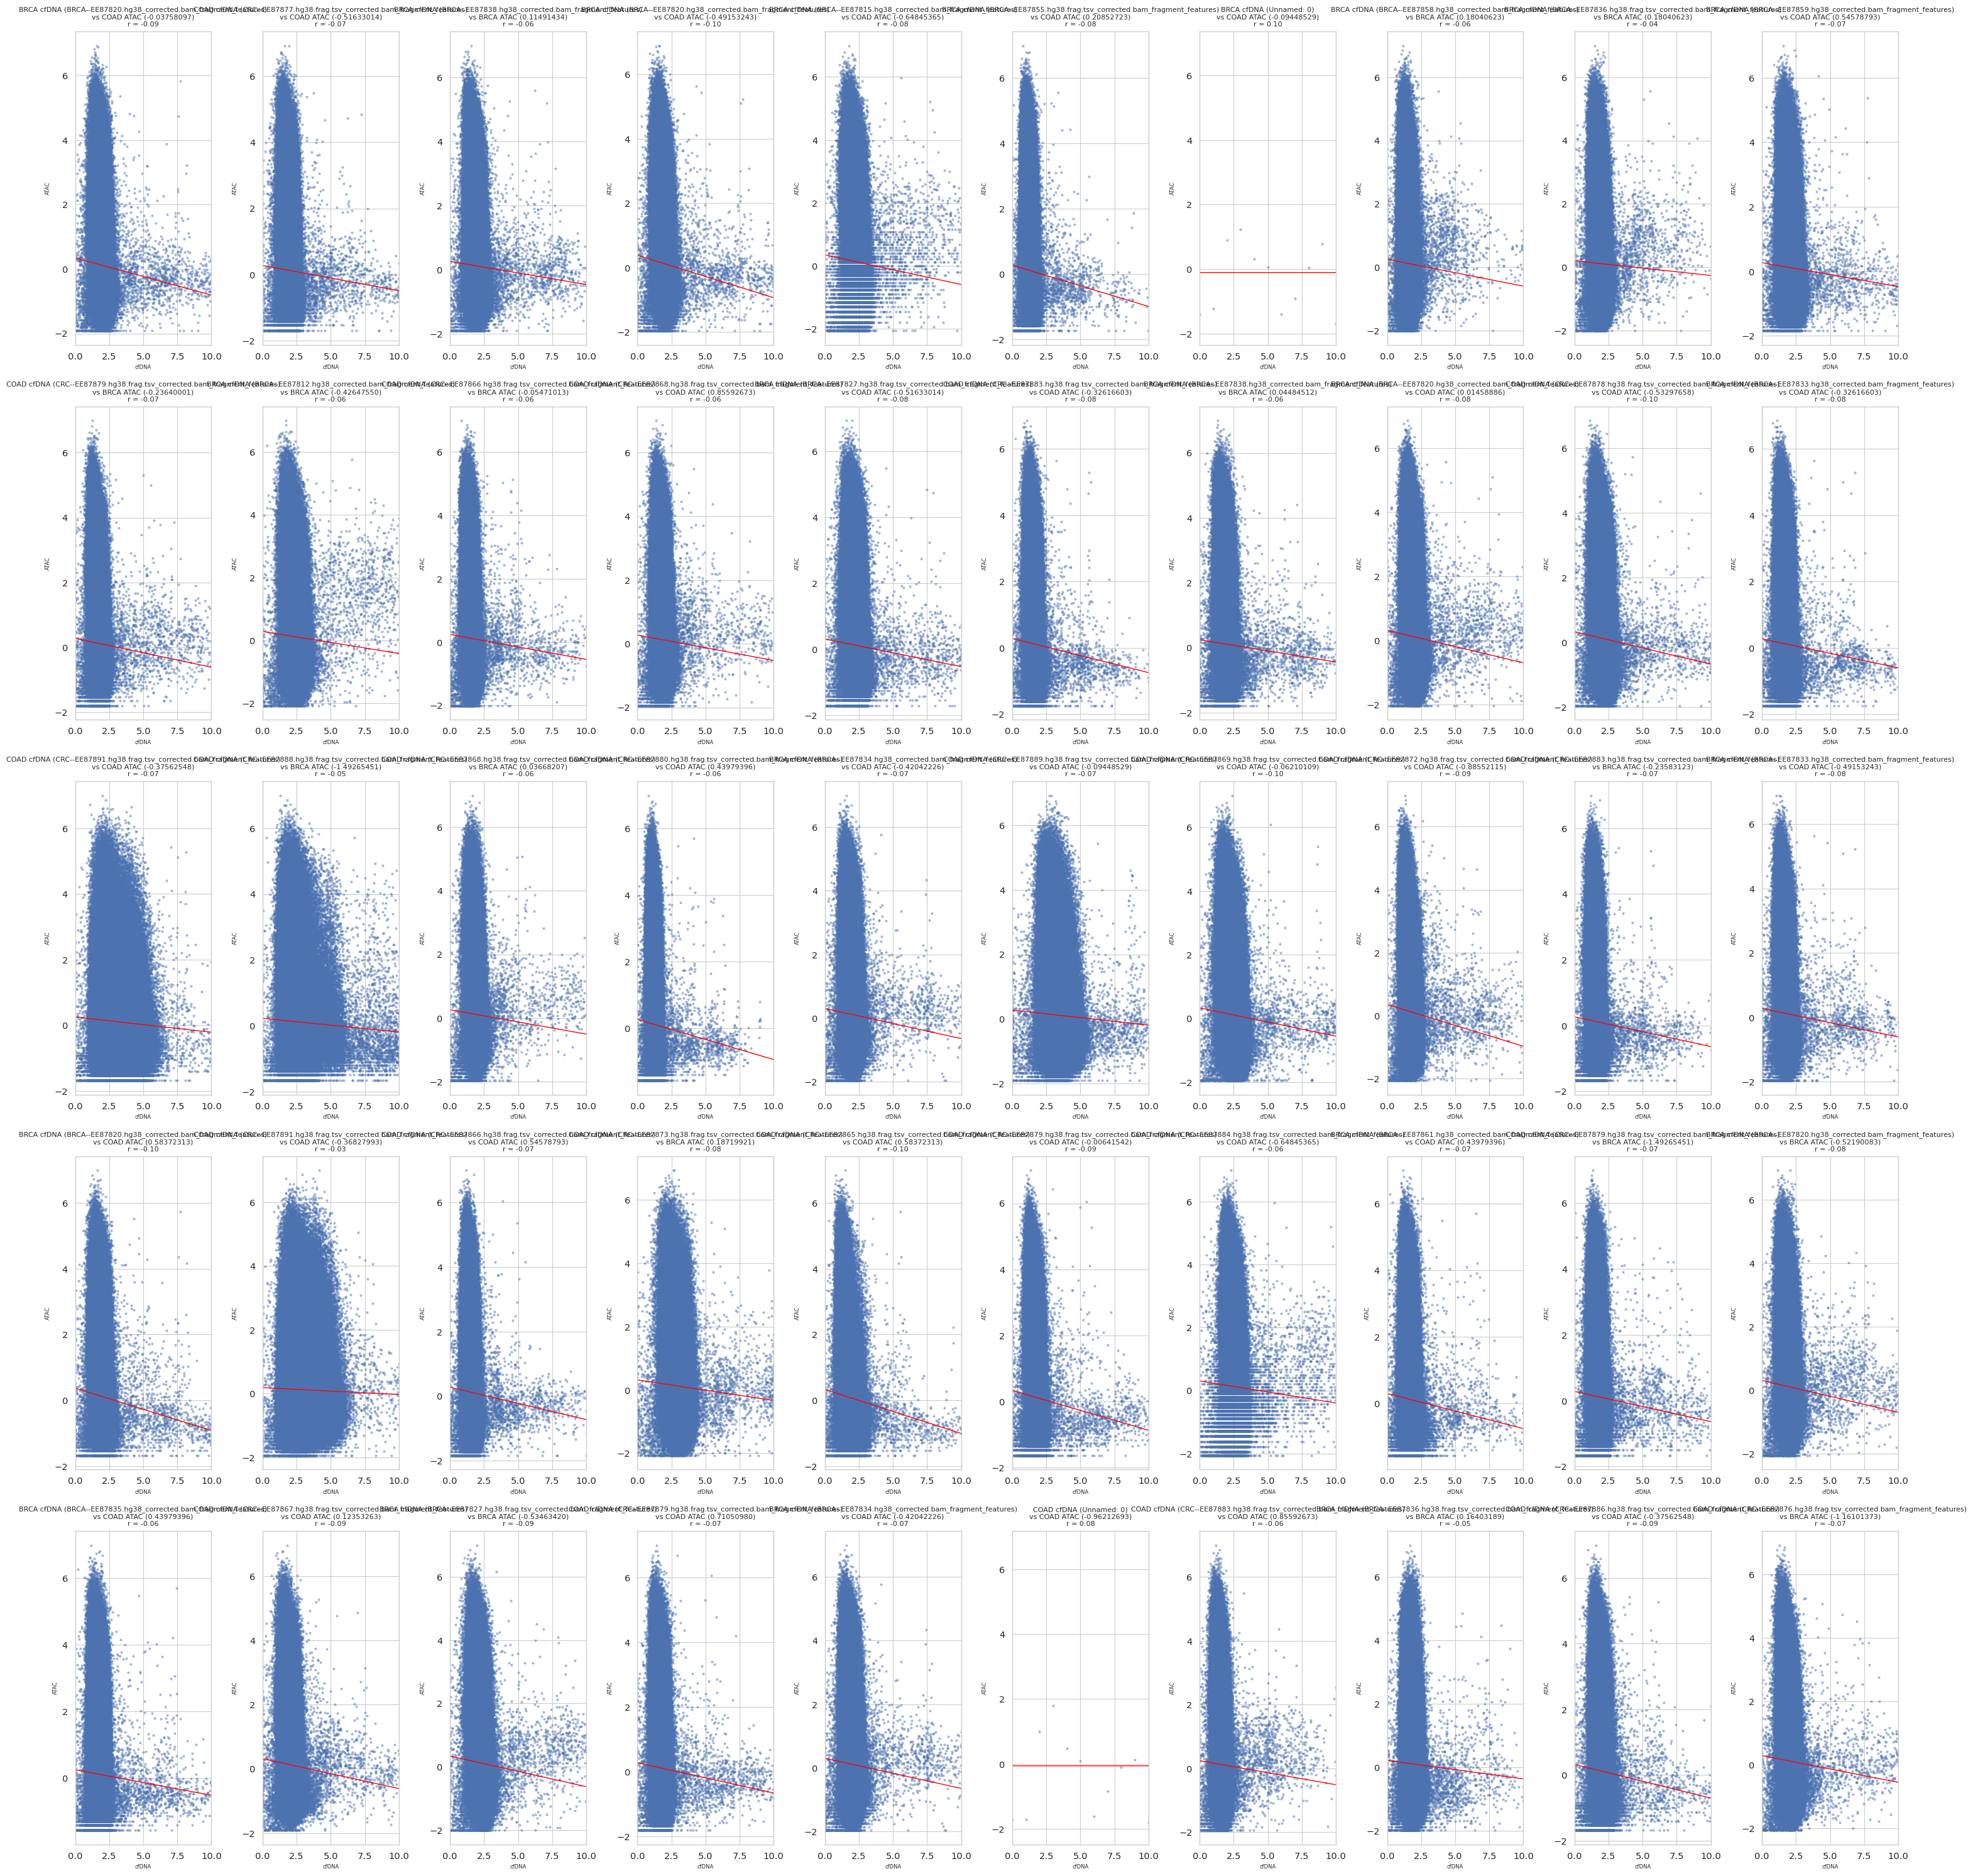

In [28]:

max_plots = 50
fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(30, 30))
axes = axes.flatten()

# Loop to create plots
for i in range(max_plots):
    # Random cfDNA source and sample
    cfDNA_source = random.choice([coad_cfdna_df, brca_cfdna_df])
    cfDNA_label = "COAD cfDNA" if cfDNA_source is coad_cfdna_df else "BRCA cfDNA"
    cfDNA_sample = random.choice(cfDNA_source.columns)

    # Random ATAC source and sample
    atac_source = random.choice([coad_atac_df, brca_atac_df])
    atac_label = "COAD ATAC" if atac_source is coad_atac_df else "BRCA ATAC"
    atac_sample = random.choice(atac_source.columns)

    # Merge by shared index
    merged_df = pd.concat([
        cfDNA_source[cfDNA_sample],
        atac_source[atac_sample]
    ], axis=1, join='inner').dropna()
    merged_df.columns = ["cfDNA", "ATAC"]

    # Pearson correlation
    r, _ = pearsonr(merged_df["cfDNA"], merged_df["ATAC"])

    # Plot
    ax = axes[i]
    ax.scatter(merged_df["cfDNA"], merged_df["ATAC"], alpha=0.4, s=5)
    ax.set_xlim(0, 10)
    ax.set_xlabel("cfDNA", fontsize=6)
    ax.set_ylabel("ATAC", fontsize=6)
    ax.set_title(
        f"{cfDNA_label} ({cfDNA_sample})\nvs {atac_label} ({atac_sample})\nr = {r:.2f}",
        fontsize=8
    )

    # Add regression line
    m, b = np.polyfit(merged_df["cfDNA"], merged_df["ATAC"], 1)
    x_fit = np.array([0, 10])
    y_fit = m * x_fit + b
    ax.plot(x_fit, y_fit, color='red', linewidth=1)

# Layout adjustment
plt.tight_layout()
plt.show()


In [60]:
cfDNA_source = coad_cfdna_df
cfDNA_sample = random.choice(cfDNA_source.columns)

# 2) Randomly pick one COAD ATAC cell type
atac_source = coad_atac_df
atac_index  = random.randint(0, atac_source.shape[1] - 1)
atac_cell   = atac_source.columns[atac_index]

# 3) Extract the two series
cf_series   = cfDNA_source[cfDNA_sample]
atac_series = atac_source[atac_cell]

# 4) Merge on shared genomic regions, drop any NAs
merged_df = pd.concat([cf_series, atac_series], axis=1, join='inner').dropna()
merged_df.columns = ["cfDNA", "ATAC"]

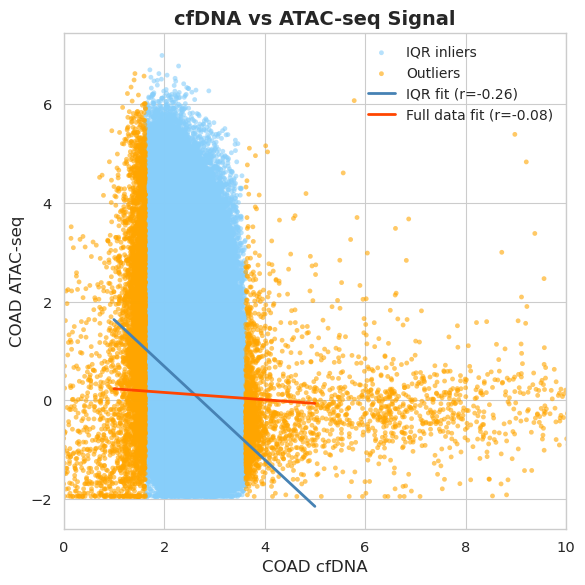

In [61]:
q1, q3 = np.percentile(merged_df["cfDNA"], [25, 75])
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

mask_iqr = merged_df["cfDNA"].between(lower_fence, upper_fence)
inliers  = merged_df.loc[mask_iqr]
outliers = merged_df.loc[~mask_iqr]

# === Full-data fit ===
m_all, b_all = np.polyfit(merged_df["cfDNA"], merged_df["ATAC"], 1)
r_all, _     = pearsonr(merged_df["cfDNA"], merged_df["ATAC"])

# === IQR-only fit ===
m_iqr, b_iqr = np.polyfit(inliers["cfDNA"], inliers["ATAC"], 1)
r_iqr, _     = pearsonr(inliers["cfDNA"], inliers["ATAC"])

# === Line endpoints (x=1 to x=5) ===
x_vals = np.array([1, 5])
y_all  = m_all * x_vals + b_all
y_iqr  = m_iqr * x_vals + b_iqr

# === Plotting ===
sns.set(style="whitegrid", context="paper", font_scale=1.2)
plt.figure(figsize=(6, 6))

# Plot inliers (blue) and outliers (orange)
plt.scatter(inliers["cfDNA"], inliers["ATAC"],
            color="lightskyblue", alpha=0.6, s=12, edgecolor="none",
            label=f"IQR inliers")
plt.scatter(outliers["cfDNA"], outliers["ATAC"],
            color="orange", alpha=0.6, s=12, edgecolor="none",
            label="Outliers")

# Plot regression lines
plt.plot(x_vals, y_iqr,  color="steelblue", linewidth=2,
         label=f"IQR fit (r={r_iqr:.2f})")
plt.plot(x_vals, y_all,  color="orangered", linewidth=2,
         label=f"Full data fit (r={r_all:.2f})")

# Labels & title
plt.xlabel("COAD cfDNA", fontsize=12)
plt.ylabel("COAD ATAC-seq", fontsize=12)
plt.title("cfDNA vs ATAC-seq Signal", fontsize=14, fontweight="bold")
plt.xlim(0, 10)

plt.legend(frameon=False, fontsize=10, loc="upper right")
plt.tight_layout()
plt.savefig(
    "/mnt/c/Users/donna/Downloads/Thesis/data_analysis/plots/single_exp1_scatter.png",
    dpi=600, bbox_inches="tight"
)
plt.show()